In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)
# Generate synthetic binary classification dataset
# - n_samples=1000: Total number of data points (rows)
# - n_features=2: Number of feature columns per sample (2D data)
# - n_classes=2: Number of classes (binary: 0 and 1)
# - n_clusters_per_class=1: Gaussian clusters per class (simple separable data)
# - n_redundant=0: No redundant/duplicate features

In [8]:
df = pd.DataFrame(X,columns=['Feature_1','Feature_2'])
df['Target'] = y
df

,Feature_1,Feature_2,Target
0,0.084616,-0.997132,0
1,1.261504,-0.768951,0
2,1.452839,1.257063,1
3,1.151415,-1.429227,0
4,2.668133,-0.407932,1
...,...,...,...
995,0.830717,-0.882743,1
996,1.614268,2.249458,1
997,1.167339,-0.677768,0
998,1.260745,2.557589,1


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

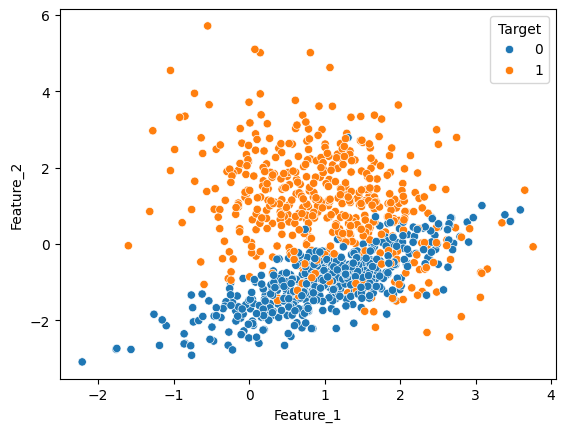

In [ ]:
sns.scatterplot(data=df,x='Feature_1',y='Feature_2',hue='Target')
# Visualize 2D feature separation by class - KEY for classification problems
# SIGNIFICANCE: Check if decision boundary is obvious (easy ML problem) before training models

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
# kernel='linear': Uses straight-line decision boundary (w*x + b = 0)
# C=1.0 (default): Regularization parameter
# High C (10-100): Complex model, fits training data tightly (risk overfitting)
# Low C (0.01-0.1): Simple model, larger margin (risk underfitting)
# Controls misclassification penalty vs margin size
# gamma='scale' (default, ignored for linear): RBF kernel coefficient only
# degree=3 (default, ignored for linear): Polynomial kernel degree only


In [15]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
svc.coef_
# coef_ = Weights for each feature in decision function: w*x + b = 0
# Example: [[-0.43414479,  1.41513362]] means Feature_1*(-0.43) + Feature_2*(1.42) + b = 0

array([[-0.43414479,  1.41513362]])

In [ ]:
y_pred = svc.predict (X_test)
from sklearn.metrics import classification_report , confusion_matrix
print (classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# classification_report: Detailed per-class and overall performance
# Shows: Precision (TP/(TP+FP)), Recall (TP/(TP+FN)), F1-score, Support (class samples)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       160
           1       0.97      0.84      0.90       140

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

[[156   4]
 [ 23 117]]


In [20]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       160
           1       0.99      0.86      0.92       140

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300

[[159   1]
 [ 19 121]]


In [21]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
## Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       160
           1       0.99      0.62      0.76       140

    accuracy                           0.82       300
   macro avg       0.87      0.81      0.81       300
weighted avg       0.86      0.82      0.81       300

[[159   1]
 [ 53  87]]


In [22]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       160
           1       0.78      0.84      0.81       140

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

[[127  33]
 [ 23 117]]


##### Linear Kernel: Creates a straight line (in 2D) or a flat plane (in 3D) to separate classes. It is the simplest and fastest but fails if the data points are mixed in a circular or complex way.

##### RBF (Radial Basis Function) Kernel: This is the most popular "go-to" kernel. It creates flexible, circular, or "blob-like" boundaries around data points. It can handle almost any shape of data by looking at how close points are to each other.

##### Polynomial Kernel: Creates curved lines. A degree=2 would look like a parabola, while degree=3 (cubic) can create more complex "S" shapes. It is great for data that has a specific geometric relationship.

##### Sigmoid Kernel: Often results in boundaries that look like two intersecting curves. As your notes mentioned, it behaves similarly to a simple neural network layer. It is used less frequently because it can be unstable if the parameters aren't tuned perfectly.

![My Image](SVM_Kernel.png)


In [27]:
# Hyperparameter tuning with Grid Search + Cross-Validation
from sklearn.model_selection import GridSearchCV

# Define parameter grid to test all combinations (5 C * 5 gamma * 1 kernel = 25 models)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],        # Regularization: low=simple, high=complex
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # RBF curvature: high=wiggly, low=smooth
    'kernel': ['rbf']                    # Fixed to RBF kernel
}

# GridSearchCV: Tests all 25 combinations, picks best via CV score
grid = GridSearchCV(
    SVC(),                    # Base SVM model
    param_grid=param_grid,    # Parameters to test
    refit=True,               # Retrain best model on full training data
    cv=5,                     # 5-fold cross-validation per combo
    verbose=3                 # Progress output (0=quiet, 3=detailed)
)

# Fit: Trains 25*5=125 models total, selects best C+gamma combo
grid.fit(X_train, y_train)

# After fit: grid.best_params_ = {'C': X, 'gamma': Y}, grid.best_score_ = CV accuracy


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [28]:
grid.best_params_,grid.best_score_

({'C': 10, 'gamma': 1, 'kernel': 'rbf'}, np.float64(0.877142857142857))